In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import seaborn as sns
import xskillscore as xs
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from scipy import stats

In [2]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots/global_maps/practical_loc'
my_data_dir = proj_dir + '/my_data/20151206.030000'
nb_dir = proj_dir + '/notebooks'

In [3]:
raisin_black = [45/256, 42/256, 50/256]
heliotrope_gray = [162/256, 155/256, 171/256]
pacific_blue = [37/256, 162/256, 192/256]
deep_saffron = [255/256, 145/256, 51/256]

In [4]:
ds = xr.open_dataset(my_data_dir+'/practical_loc_global_Ne80.nc')
plot_prefix = 'Ne80_'
plot_title_end = ', ens size = 80'

In [5]:
def plot_field(field_name, ds, title='default'):
    ## Compute vmin and vmax
    vals = ds[field_name].values
    vmin = np.nanpercentile(vals, 2.5)
    vmax = np.nanpercentile(vals, 97.5)
    ## Save a map of the world showing atm surface pressure
    ax = plt.axes(projection=ccrs.Mollweide())
    ax.set_global()
    im = ax.pcolormesh(ds['lon'], ds['lat'], ds[field_name], vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='silver'))
    plt.colorbar(im)
    if title=='default':
        plt.title(field_name+plot_title_end)
    else:
        plt.title(title)
    ax.coastlines(resolution='110m')
    ax.gridlines()
    # Save
    plt.rcParams['figure.figsize'] = [12,6]
    plt.savefig(plot_dir+'/'+plot_prefix+field_name+'.png')
    plt.show()
    plt.close()

In [6]:
keys = list(ds.data_vars)

In [7]:
keys

['error_unloc_atm_ast',
 'error_unloc_ocn_ast',
 'error_true_K_atm_ast',
 'error_true_K_ocn_ast',
 'error_practical_gcr_atm_ast',
 'error_practical_gcr_ocn_ast',
 'error_practical_cutoffloc_atm_ast',
 'error_practical_cutoffloc_ocn_ast',
 'error_unloc_atm_sst',
 'error_unloc_ocn_sst',
 'error_true_K_atm_sst',
 'error_true_K_ocn_sst',
 'error_practical_gcr_atm_sst',
 'error_practical_gcr_ocn_sst',
 'error_practical_cutoffloc_atm_sst',
 'error_practical_cutoffloc_ocn_sst']

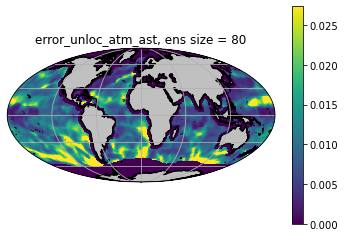

In [8]:
plot_field(keys[0], ds)

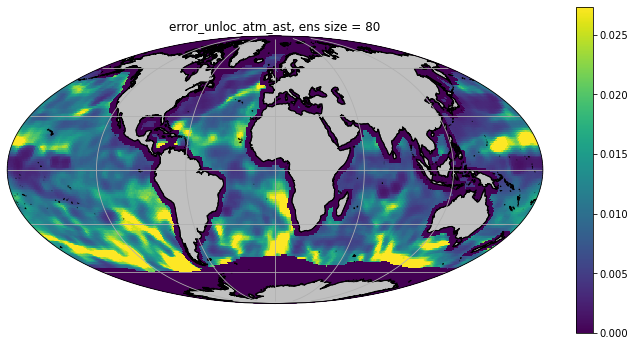

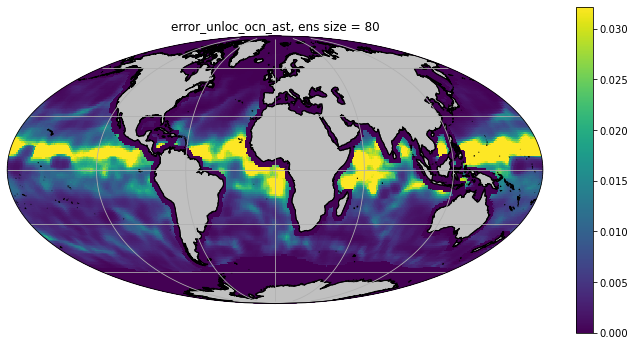

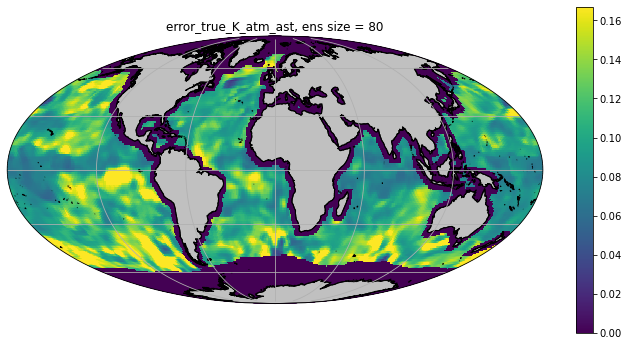

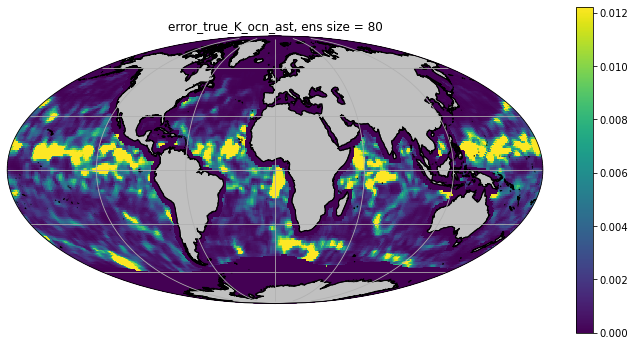

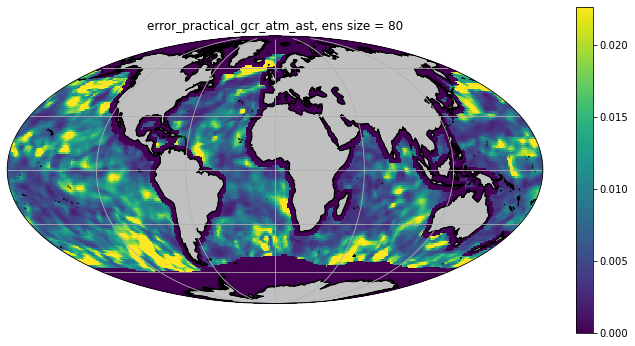

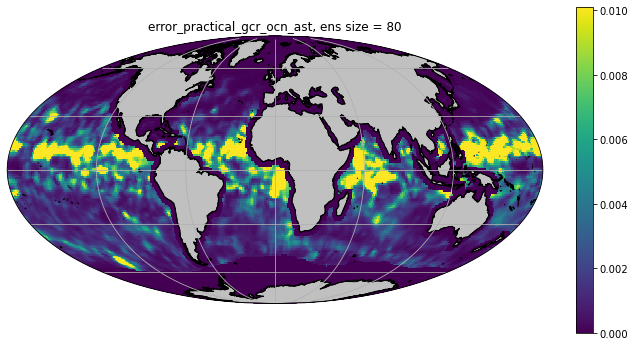

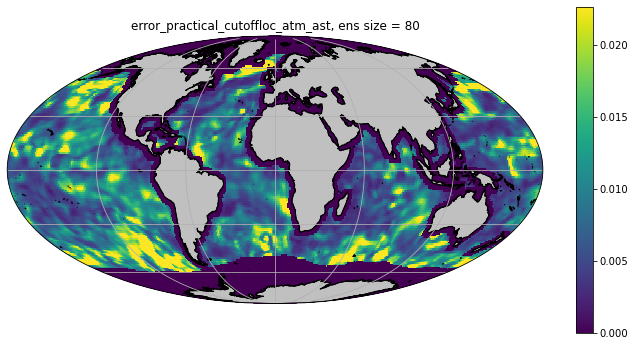

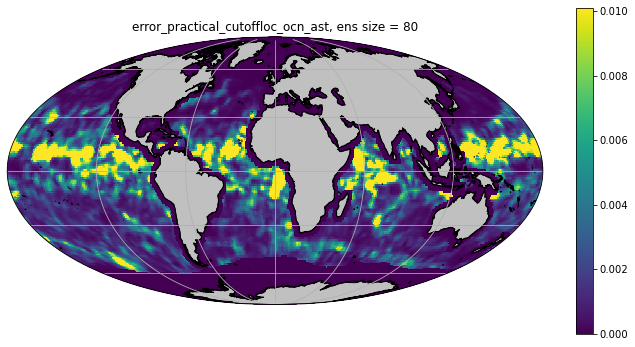

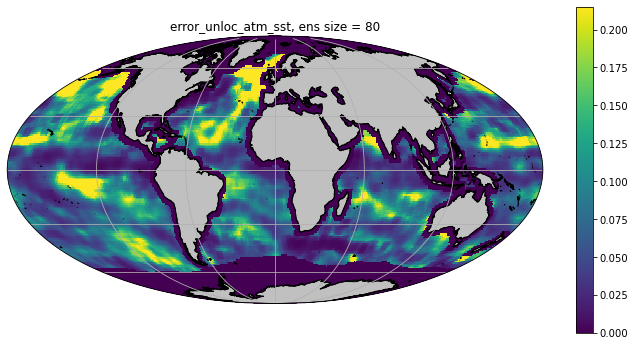

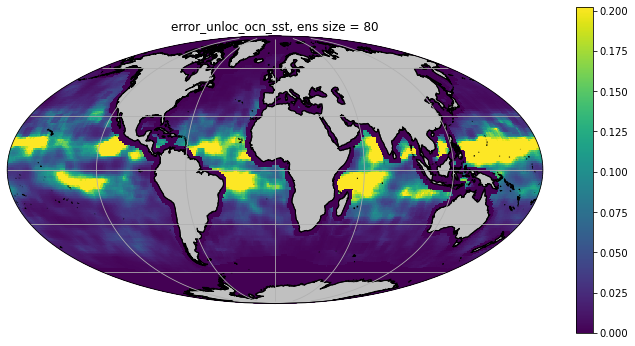

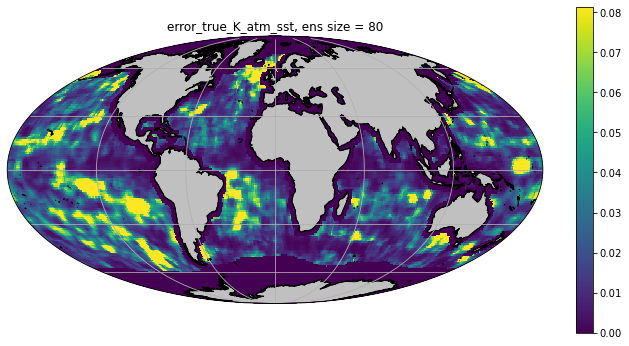

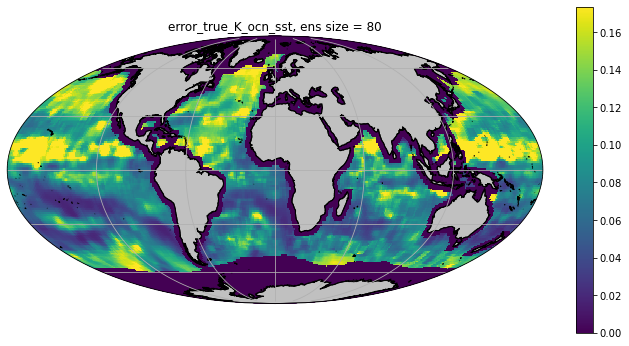

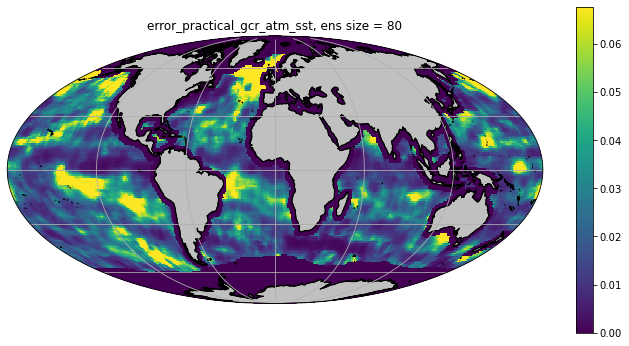

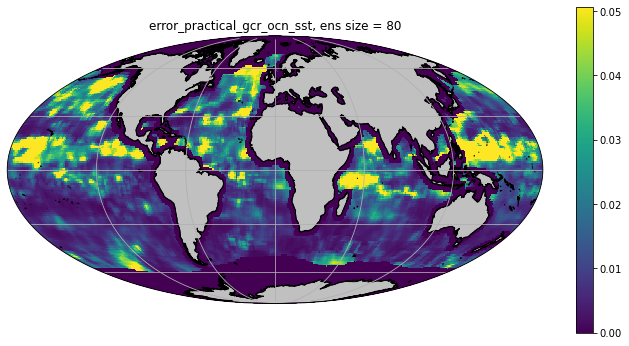

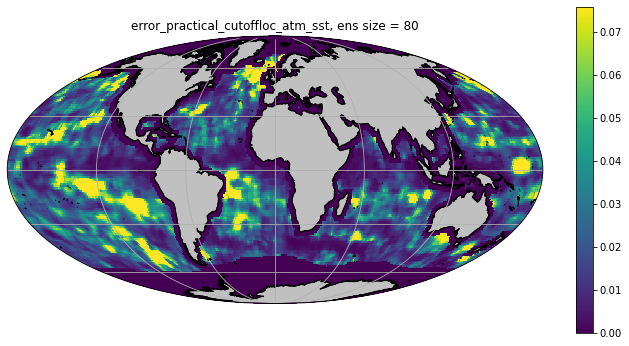

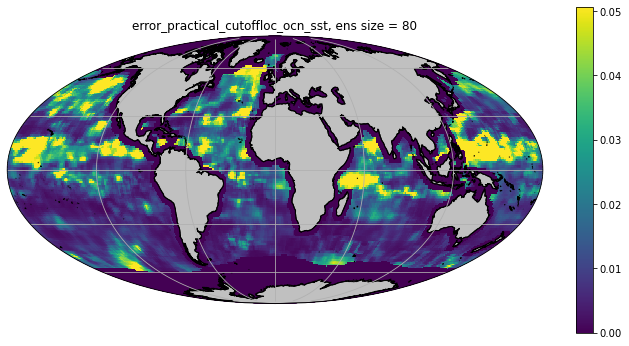

In [9]:
for ii in range(len(keys)):
    plot_field(keys[ii], ds)

In [10]:
for ii in (0,4,6):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[2]] 

error_unloc_atm_ast
error_practical_gcr_atm_ast
error_practical_cutoffloc_atm_ast


In [11]:
for ii in (1, 5, 7):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[3]] 

error_unloc_ocn_ast
error_practical_gcr_ocn_ast
error_practical_cutoffloc_ocn_ast


In [12]:
for ii in (8,12,14):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[10]] 

error_unloc_atm_sst
error_practical_gcr_atm_sst
error_practical_cutoffloc_atm_sst


In [13]:
for ii in (9,13,15):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[11]] 

error_unloc_ocn_sst
error_practical_gcr_ocn_sst
error_practical_cutoffloc_ocn_sst


In [14]:
keys2 = list(ds.data_vars)

In [15]:
keys2

['error_unloc_atm_ast',
 'error_unloc_ocn_ast',
 'error_true_K_atm_ast',
 'error_true_K_ocn_ast',
 'error_practical_gcr_atm_ast',
 'error_practical_gcr_ocn_ast',
 'error_practical_cutoffloc_atm_ast',
 'error_practical_cutoffloc_ocn_ast',
 'error_unloc_atm_sst',
 'error_unloc_ocn_sst',
 'error_true_K_atm_sst',
 'error_true_K_ocn_sst',
 'error_practical_gcr_atm_sst',
 'error_practical_gcr_ocn_sst',
 'error_practical_cutoffloc_atm_sst',
 'error_practical_cutoffloc_ocn_sst',
 'error_unloc_atm_ast_relative',
 'error_practical_gcr_atm_ast_relative',
 'error_practical_cutoffloc_atm_ast_relative',
 'error_unloc_ocn_ast_relative',
 'error_practical_gcr_ocn_ast_relative',
 'error_practical_cutoffloc_ocn_ast_relative',
 'error_unloc_atm_sst_relative',
 'error_practical_gcr_atm_sst_relative',
 'error_practical_cutoffloc_atm_sst_relative',
 'error_unloc_ocn_sst_relative',
 'error_practical_gcr_ocn_sst_relative',
 'error_practical_cutoffloc_ocn_sst_relative']

In [16]:
keys2 = list(ds.data_vars)
keys2 = keys2[16:]

In [17]:
keys2

['error_unloc_atm_ast_relative',
 'error_practical_gcr_atm_ast_relative',
 'error_practical_cutoffloc_atm_ast_relative',
 'error_unloc_ocn_ast_relative',
 'error_practical_gcr_ocn_ast_relative',
 'error_practical_cutoffloc_ocn_ast_relative',
 'error_unloc_atm_sst_relative',
 'error_practical_gcr_atm_sst_relative',
 'error_practical_cutoffloc_atm_sst_relative',
 'error_unloc_ocn_sst_relative',
 'error_practical_gcr_ocn_sst_relative',
 'error_practical_cutoffloc_ocn_sst_relative']

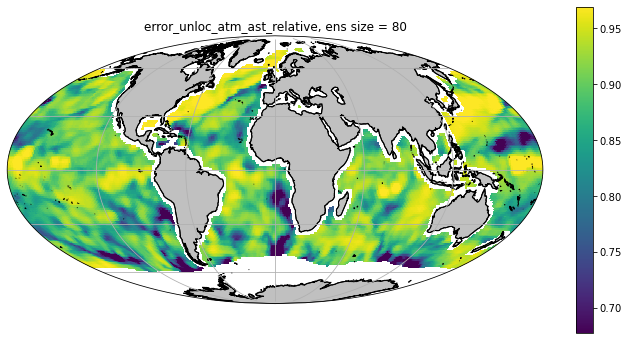

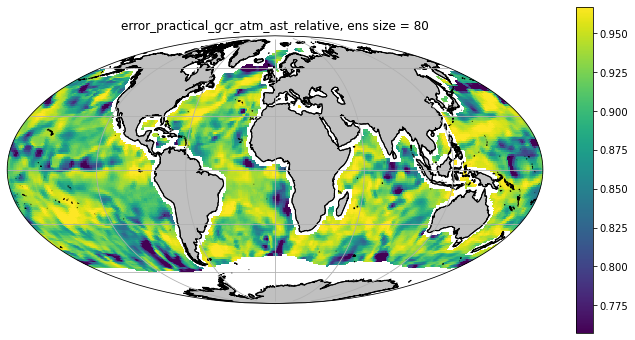

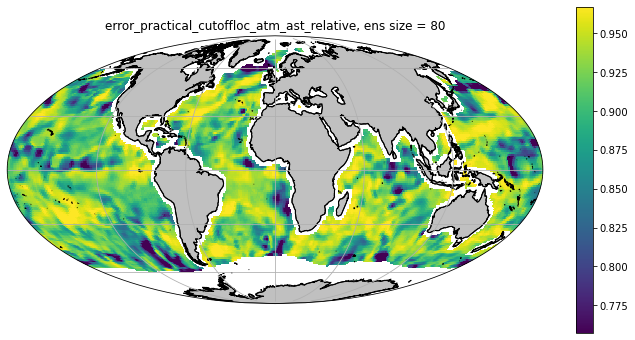

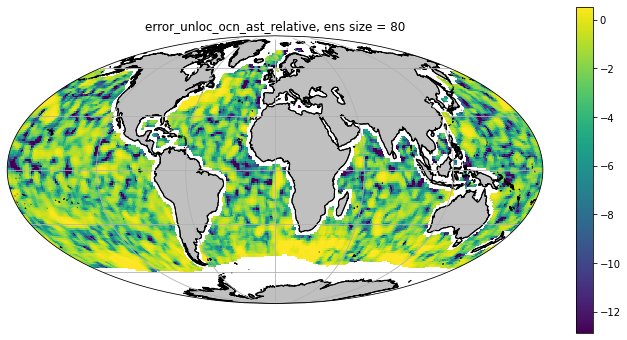

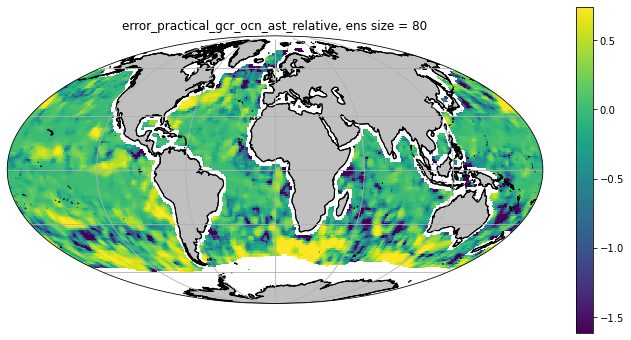

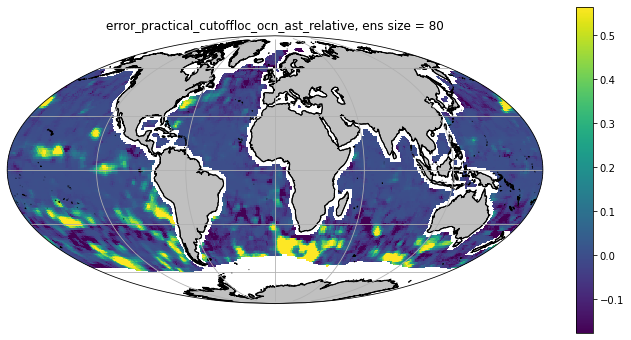

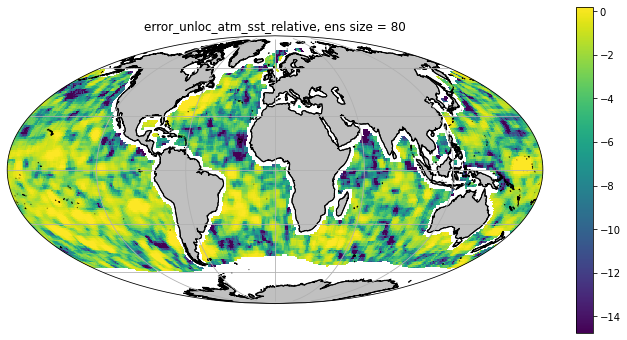

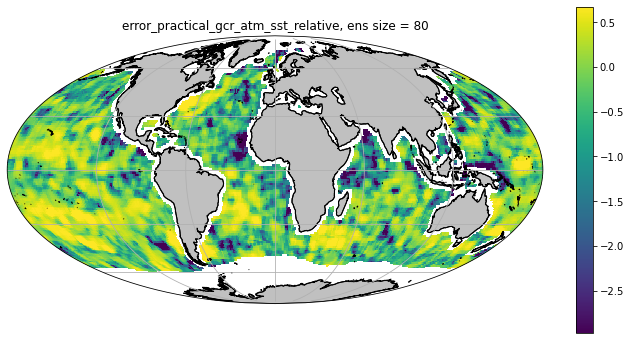

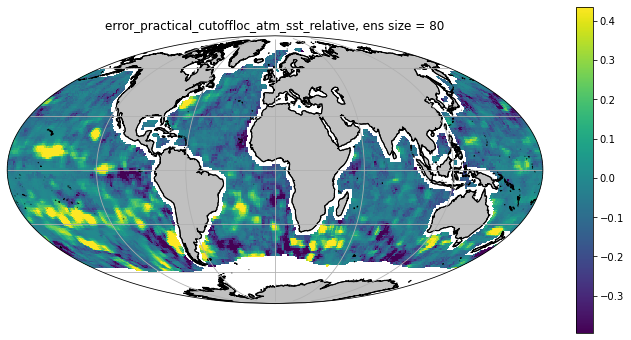

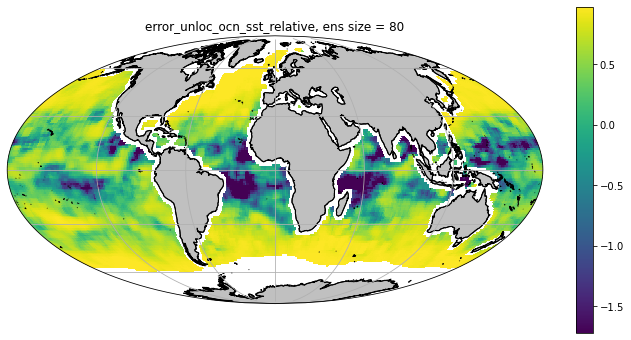

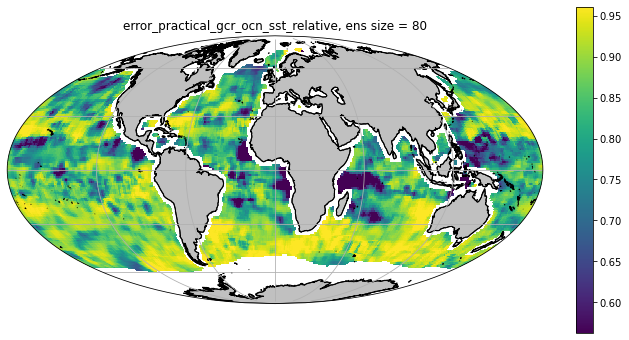

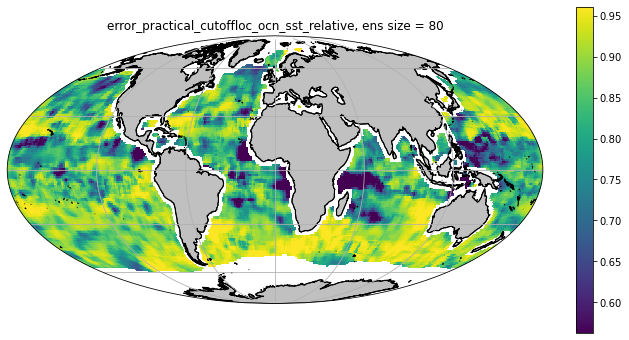

In [18]:
for ii in range(len(keys2)):
    plot_field(keys2[ii], ds)

In [19]:
unloc_errs = np.nanmedian(ds[keys2[0]].values.flatten())

In [20]:
unloc_errs

0.9034364

In [21]:
loc_errs = []*2

In [116]:
np.sum(np.abs(ds[keys2[4]]) < 1e3)

<xarray.DataArray 'error_practical_gcr_ocn_ast_relative' ()>
array(24799)

In [133]:
mask = np.logical_and( (ds['error_unloc_ocn_sst'] == 0), (ds['error_true_K_atm_ast']==0))
mask = np.logical_or(mask, (ds['error_true_K_atm_sst']==0))
mask = np.logical_or(mask, (ds['error_true_K_ocn_ast']==0))
mask = np.logical_or(mask, (ds['error_true_K_ocn_sst']==0))
mask = np.logical_or(mask, (np.abs(ds[keys2[4]]) > 1e3))
mask = np.logical_or(mask, (np.abs(ds[keys2[5]]) > 1e3))
mask = np.logical_or(mask, (np.abs(ds[keys2[7]]) > 1e3))
mask = np.logical_or(mask, (np.abs(ds[keys2[8]]) > 1e3))

In [134]:
np.sum(mask)

<xarray.DataArray 'error_unloc_ocn_sst' ()>
array(40001)

In [135]:
len(keys2)

12

In [136]:
loc_errs_ast_atm   = 100*np.array([ds[keys2[1]].where(~mask).values.flatten(),ds[keys2[2]].where(~mask).values.flatten()])
loc_errs_ast_ocn   = 100*np.array([ds[keys2[4]].where(~mask).values.flatten(),ds[keys2[5]].where(~mask).values.flatten()])
loc_errs_sst_atm   = 100*np.array([ds[keys2[7]].where(~mask).values.flatten(),ds[keys2[8]].where(~mask).values.flatten()])
loc_errs_sst_ocn   = 100*np.array([ds[keys2[10]].where(~mask).values.flatten(),ds[keys2[11]].where(~mask).values.flatten()])

In [137]:
hold = ds[keys2[4]].where(~mask).values.flatten()

In [138]:
hold[~np.isnan(hold)].min()

-413.51215

In [139]:
df_ast_atm = pd.DataFrame(loc_errs_ast_atm.T, columns =['GC', 'Cutoff'] )
df_ast_ocn = pd.DataFrame(loc_errs_ast_ocn.T, columns =['GC', 'Cutoff'] )
df_sst_atm = pd.DataFrame(loc_errs_sst_atm.T, columns =['GC', 'Cutoff'] )
df_sst_ocn = pd.DataFrame(loc_errs_sst_ocn.T, columns =['GC', 'Cutoff'] )

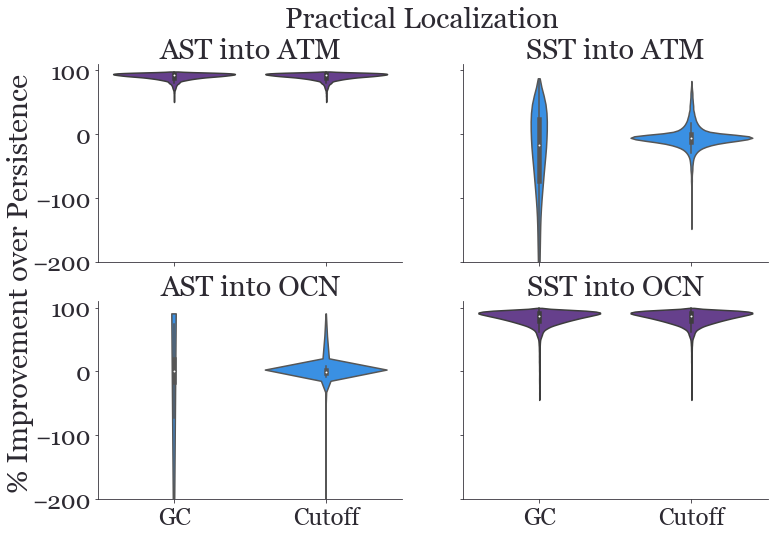

In [143]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True) 

# Violin Plots
bars = sns.violinplot(data=df_ast_atm, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[0,0])
bars = sns.violinplot(data=df_ast_ocn, cut=0, alpha=0.8, color='dodgerblue', ax=axs[1,0])
bars = sns.violinplot(data=df_sst_atm, cut=0, alpha=0.8, color='dodgerblue', ax=axs[0,1])
bars = sns.violinplot(data=df_sst_ocn, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[1,1])

# Titles
fig.supylabel('% Improvement over Persistence', color=raisin_black)
fig.suptitle('Practical Localization', color=raisin_black)
axs[0,0].set_title('AST into ATM', color=raisin_black)
axs[0,1].set_title('SST into ATM', color=raisin_black)
axs[1,0].set_title('AST into OCN', color=raisin_black)
axs[1,1].set_title('SST into OCN', color=raisin_black)

# Adjust aesthetics
for ax in axs.reshape(-1):
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
    ax.set_ylim(-200, 110)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':24})
plt.savefig(plot_dir+'/'+plot_prefix+'ast_sst_practicalloc_errors_violin_plot.png',  bbox_inches='tight')
plt.show()

In [28]:
ds_corr = xr.open_dataarray(my_data_dir+'/sst_ast_corr.nc')

In [29]:
ast_sst_corr = ds_corr.where(~mask).values.flatten()

In [30]:
locrad_gcr_ocn_ast = ds['locrad_gcr_ocn_ast'].where(~mask).values.flatten()

In [31]:
ds_corr.values

array([[-0.0824931 , -0.08232362, -0.08216007, ..., -0.08301321,
        -0.08284417, -0.08266821],
       [-0.04077065, -0.0403388 , -0.03991184, ..., -0.04211522,
        -0.04165924, -0.04120866],
       [ 0.07303777,  0.07303662,  0.07318783, ...,  0.06160454,
         0.06094781,  0.07318473],
       ...,
       [ 0.04487454, -0.0097971 , -0.13571492, ...,  0.15557595,
         0.18704593,  0.01027568],
       [ 0.1994809 ,  0.23052141,  0.21475205, ..., -0.03326472,
         0.06114216,  0.11187137],
       [ 0.21329435,  0.20900572,  0.02836346, ..., -0.05536654,
        -0.0509802 ,  0.19490204]])